In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"


df = pd.read_csv(url, sep=';')
df1 = df.loc[:, ["TurId", "Kommune","Dato", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]]
df1.head(10)

#test

#Identify 5 unique features

,TurId,Kommune,Dato,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
0,15006-2020-08-10T10:24:00+02:00,Bærum,10/08/2020,10:53:53,10:53:00
1,15002-2020-08-15T12:54:00+02:00,Bærum,15/08/2020,13:12:20,13:12:00
2,15004-2020-08-03T09:54:00+02:00,Bærum,03/08/2020,10:18:56,10:19:00
3,15003-2020-07-27T13:00:00+02:00,Bærum,27/07/2020,13:52:04,13:51:00
4,15002-2020-08-27T07:15:00+02:00,Bærum,27/08/2020,07:34:13,07:33:00
5,3110-2020-08-01T16:16:00+02:00,Bjerke,01/08/2020,17:22:56,17:16:00
6,15010-2020-07-28T13:09:00+02:00,Bærum,28/07/2020,13:19:00,13:17:00
7,15003-2020-07-27T06:18:00+02:00,St.Hanshaugen,27/07/2020,06:20:24,06:20:00
8,21002-2020-08-16T14:33:00+02:00,Bærum,16/08/2020,15:10:12,15:09:00
9,15002-2020-08-13T18:09:00+02:00,Bærum,13/08/2020,18:37:41,18:29:00


In [94]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [182]:
dfdato = df1['Dato'].value_counts().rename_axis('Dato').to_frame('Antall')
dfdato.head(20)

,Antall
Dato,
18/08/2020,112
19/08/2020,109
24/08/2020,102
28/08/2020,100
29/07/2020,99
20/08/2020,98
17/08/2020,97
17/07/2020,96
31/07/2020,95


<function matplotlib.pyplot.show(close=None, block=None)>

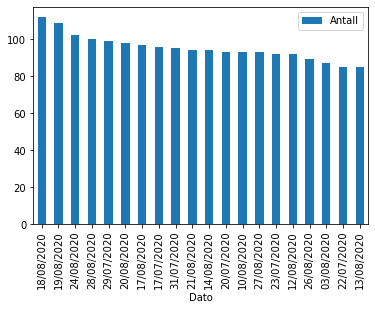

In [183]:
dfdato1 = dfdato.head(20)
dfdato1.plot.bar()
plt.show